# Predictive Analytics

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Logistic Regression

Logistic Regression is a supervised machine learning algorithm which is used to solve classifications problems.

Logistic Regression uses a linear equation to predict a value which can be anywhere between negative and positive infinity. The output needs to be between 0 and 1 to make the classification. In order to scale the output between 0 and 1, the sigmoid function is used: $$\frac{1}{1+e^{(-z)}}$$ where $z$ is the output value.  

This is a linear function, which means that it will build a line which splits the data into two parts. When a new value wants to be determined, the function will set it into one class or another. A threshold with the value 0.5 means that a class with a 50% (or greater) probability will be classified as _class1_, otherwise, it would be classified as _class2_. 

## Importing data using Pandas

In [2]:
df_full_weekly = pd.read_csv('Data/3.Data Preparation/df_full_weekly.csv')
df_full_weekly.drop(df_full_weekly.columns[0], axis=1, inplace=True)

df_full_weekly = df_full_weekly.astype('float')
df_full_weekly.head()

,delivery,consumption,T,SQ,Q,N,week,month,season,heating_sys,no_people,no_solar_panels,sp_group
0,91.363,35.031,16.282517,2.041958,68.468531,6.657343,28.0,7.0,2.0,1.0,4.0,17.0,3.0
1,155.805,25.393,18.701190,3.732143,88.041667,5.446429,29.0,7.0,2.0,1.0,4.0,17.0,3.0
2,115.273,12.460,17.673506,2.405493,72.859451,7.172859,30.0,7.0,2.0,1.0,4.0,17.0,3.0
3,23.200,2.087,17.550000,3.958333,89.333333,6.958333,31.0,7.0,2.0,1.0,4.0,17.0,3.0
4,124.050,13.106,17.240972,2.923611,77.013889,5.847222,31.0,8.0,2.0,1.0,4.0,17.0,3.0


### Weekly dataset
#### Predicting the heating system

First of all, we divide the dataset into the X features and the target feature.

In [3]:
features = df_full_weekly.columns[:-4]
target_feature = 'heating_sys'

# Setting X and y
X = df_full_weekly[features]
y = df_full_weekly[target_feature]

In order to create the model, we use a Pipeline, which allows us to set what we want to use inside it.

In order to normalize the data, we use the StandarScaler library, which standardize features by removing the mean and scaling to unit variance. The standard score of a sample $x$ is calculated as: $z = (x - u) / s$, where $u$ is the mean of the training samples, and s is the standard deviation of the training samples.

In this case, we use Logistic Regression. One of the features of the pipeline is that we are able to select different values for the model parameters. The pipeline will execute all the different possibilities and give us the best one. For this model, we will set the following parameters:
* **penalty:** Used to specify the norm used in the penalization.
* **C:** Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [4]:
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression(multi_class='auto', solver='liblinear'))]

pipeline = Pipeline(steps)

param_grid = {'lreg__penalty' : ['l1', 'l2'],
              'lreg__C' : np.logspace(-4, 4, 20)}

log_clf = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
log_clf.fit(X, y)

score_weekly_hs = log_clf.best_score_

display(log_clf.best_estimator_)
display('Score: ' + str(log_clf.best_score_))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lreg', LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

'Score: 0.5214683710258932'

#### Predicting the nº of people

In [5]:
features = df_full_weekly.columns[:-4]
target_feature = 'no_people'

# Setting X and y
X = df_full_weekly[features]
y = df_full_weekly[target_feature]

In [6]:
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression(multi_class='auto', solver='liblinear'))]

pipeline = Pipeline(steps)

param_grid = {'lreg__penalty' : ['l1', 'l2'],
              'lreg__C' : np.logspace(-4, 4, 20)}

log_clf = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
log_clf.fit(X, y)

score_weekly_pe = log_clf.best_score_

display(log_clf.best_estimator_)
display('Score: ' + str(log_clf.best_score_))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lreg', LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

'Score: 0.38020321206161917'

#### Predicting the nº of solar panels

In [7]:
features = df_full_weekly.columns[:-4]
target_feature = 'sp_group'

# Setting X and y
X = df_full_weekly[features]
y = df_full_weekly[target_feature]

In [8]:
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression(multi_class='auto', solver='liblinear'))]

pipeline = Pipeline(steps)

param_grid = {'lreg__penalty' : ['l1', 'l2'],
              'lreg__C' : np.logspace(-4, 4, 20)}

log_clf = GridSearchCV(pipeline, param_grid, cv=5, return_train_score=True)
log_clf.fit(X, y)

score_weekly_sp = log_clf.best_score_

display(log_clf.best_estimator_)
display('Score: ' + str(log_clf.best_score_))

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lreg', LogisticRegression(C=29.763514416313132, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

'Score: 0.4578826614224844'

## Model scores

In [9]:
lreg_scores = pd.DataFrame({'target': ['Heating system', 'Nº of people', 'Nº of solar panels'],
                          'score': [score_weekly_hs, score_weekly_pe, score_weekly_sp]})

Text(0.5, 0, 'Target')

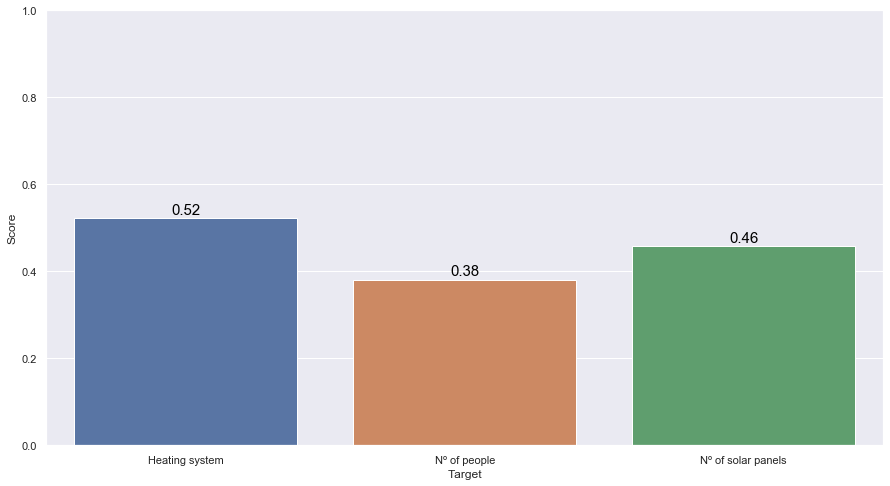

In [10]:
fig = plt.figure(figsize=(15,8))
ax = sns.barplot(x="target", y="score", data=lreg_scores)

for index, row in lreg_scores.iterrows():
    ax.text(index, (row.score + 0.01), round(row.score, 2), color='black', ha="center", fontsize=15)

ax.set_ylim(0,1)
ax.set_ylabel('Score')
ax.set_xlabel('Target')